<a href="https://colab.research.google.com/github/Nirdesh-arc/Nirdesh_Khadka_Concept_and_Tech_of_AI/blob/main/workshop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve)
from sklearn.preprocessing import LabelBinarizer  # For binary targets
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

print("All libraries loaded! Ready for both exercises.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


All libraries loaded! Ready for both exercises.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:

def preprocess_text(text):
    """Simple text cleaning as per worksheet"""

    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)


try:
    df = pd.read_csv('../week2/Dataset/IMDB Dataset 2.csv')
    print("IMDB loaded from file!")
except:

    print("No imdb.csv found - using sample data for demo")
    df = pd.DataFrame({
        'review': [
            "This movie was amazing great acting fantastic plot",
            "Terrible film waste of time boring characters",
            "Loved every minute beautiful cinematography",
            "Worst movie ever seen disappointing ending"
        ] * 40,
        'sentiment': ['positive', 'negative', 'positive', 'negative'] * 40
    })
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print(f"Dataset shape: {df.shape}")
print("\nFirst review preview:")
print(df['review'].iloc[0][:200] + "...")
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Convert sentiment to numeric (positive=1, negative=0) if not already numeric
if df['sentiment'].dtype == 'object':
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df['clean_review'] = df['review'].apply(preprocess_text)
print("Preprocessing done!")

No imdb.csv found - using sample data for demo
Dataset shape: (160, 2)

First review preview:
This movie was amazing great acting fantastic plot...

Sentiment distribution:
sentiment
1    80
0    80
Name: count, dtype: int64
Preprocessing done!


In [3]:
# To-Do 2: 80-20 split
X = df['clean_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = CountVectorizer(max_features=5000, min_df=2)  # Top 5k words
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print(f"BoW features: {X_train_bow.shape[1]}")

# To-Do 3b: Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
print("Naive Bayes trained!")

BoW features: 22
Naive Bayes trained!


NAIVE BAYES RESULTS:
Accuracy    : 1.000
Precision   : 1.000
Recall      : 1.000
F1-Score    : 1.000
ROC-AUC     : 1.000


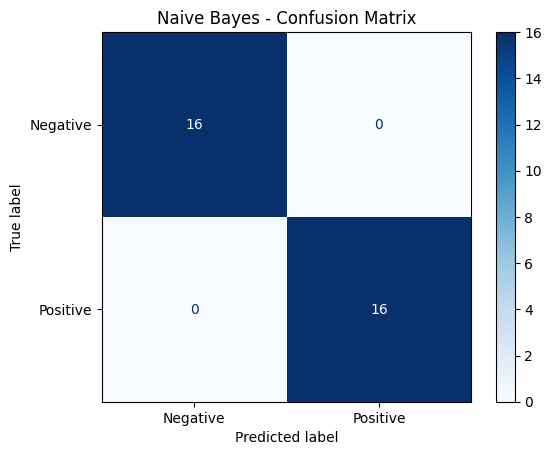

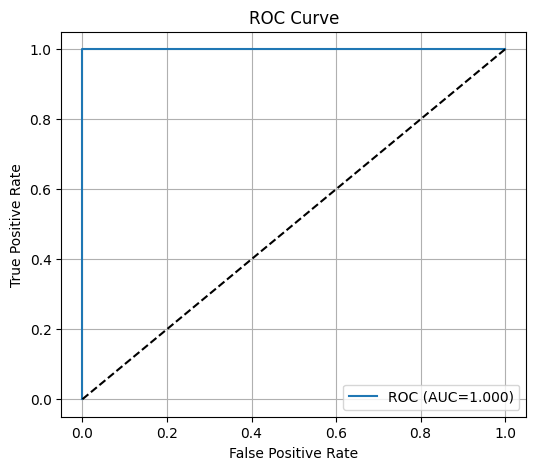

In [4]:
# To-Do Part 2: Full evaluation
y_pred = nb_model.predict(X_test_bow)
y_pred_proba = nb_model.predict_proba(X_test_bow)[:, 1]

# All metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
}

print("NAIVE BAYES RESULTS:")
for name, score in metrics.items():
    print(f"{name:12}: {score:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC={metrics["ROC-AUC"]:.3f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Breast Cancer loaded (569 rows, 30 features)
Shape: (569, 31)

Target distribution:
target
1    357
0    212
Name: count, dtype: int64

 Key statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01

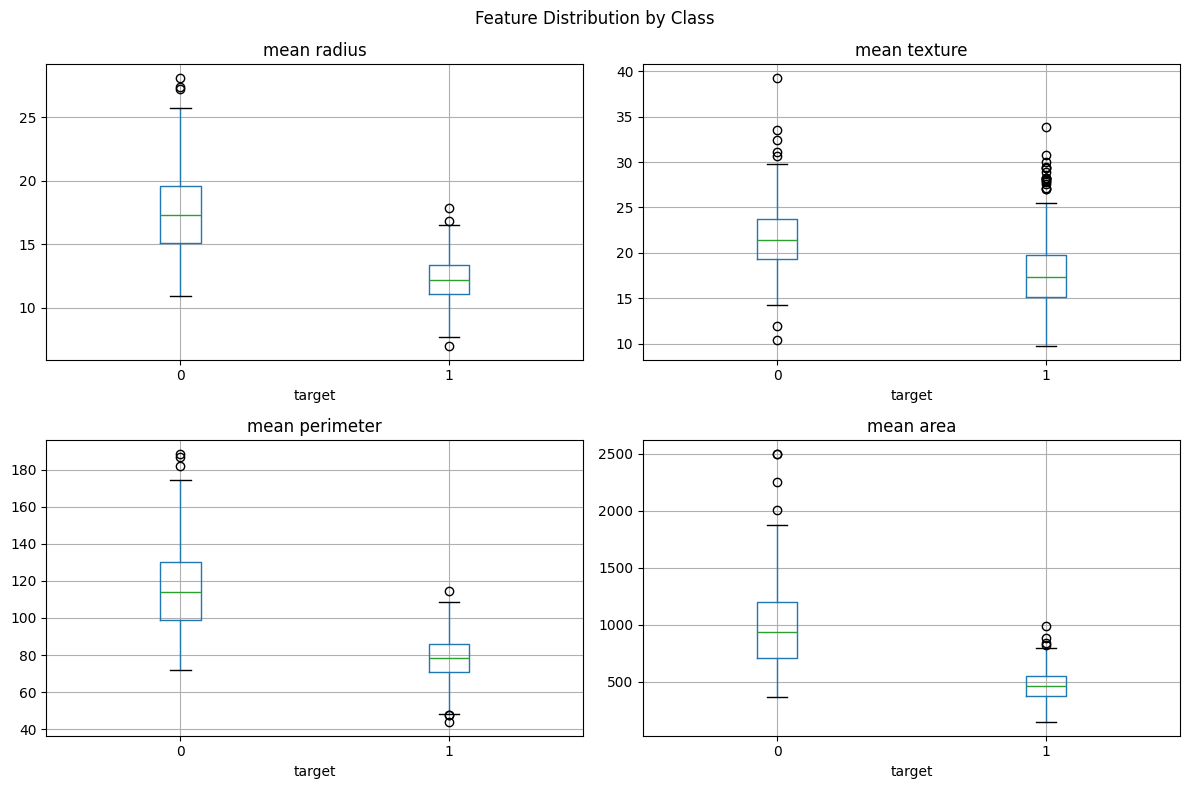

In [5]:

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns=data.feature_names)
df_bc['target'] = data.target  # 0= malignant, 1= benign

print("Breast Cancer loaded (569 rows, 30 features)")
print(f"Shape: {df_bc.shape}")
print("\nTarget distribution:")
print(df_bc['target'].value_counts())

# To-Do 1c: EDA
print("\n Key statistics:")
print(df_bc.describe())

# Check missing values
print(f"\nMissing values: {df_bc.isnull().sum().sum()}")  # Should be 0

# Visualize feature distribution (top 4)
fig, axes = plt.subplots(2, 2, figsize=(12,8))
for i, col in enumerate(df_bc.columns[:4]):
    ax = axes[i//2, i%2]
    df_bc.boxplot(column=col, by='target', ax=ax)
    ax.set_title(col)
plt.suptitle('Feature Distribution by Class')
plt.tight_layout()
plt.show()

🔝 TOP 5 SELECTED FEATURES:
['mean radius', 'texture error', 'worst radius', 'worst compactness', 'worst concavity']

Full Feature Ranking (1 = selected):
                 Feature  Ranking
0            mean radius        1
11         texture error        1
25     worst compactness        1
20          worst radius        1
26       worst concavity        1
28        worst symmetry        2
27  worst concave points        3
6         mean concavity        4
24      worst smoothness        5
12       perimeter error        6


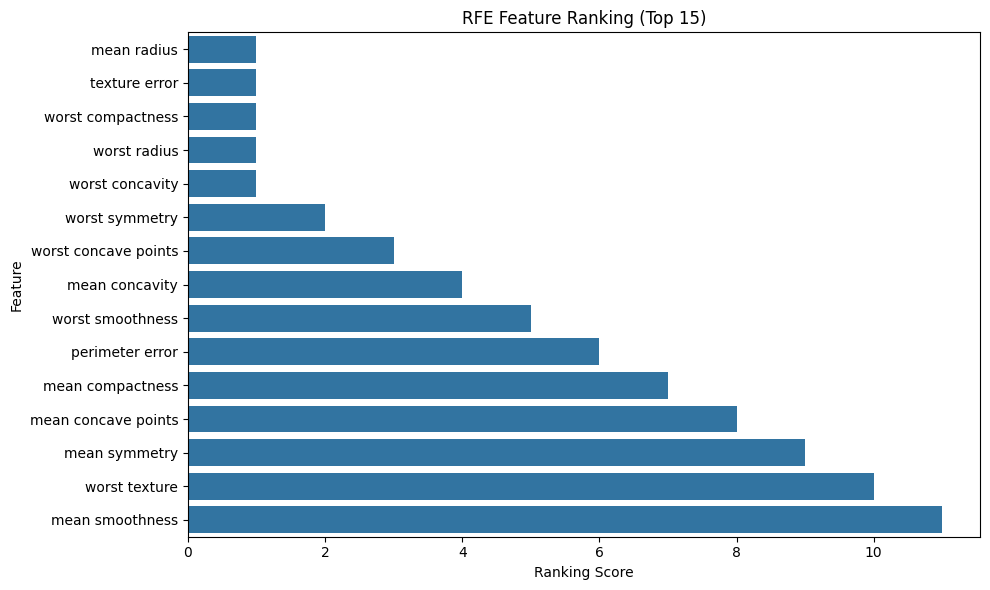

In [6]:
# To-Do 1d: 80-20 split
X_bc = df_bc.drop('target', axis=1)
y_bc = df_bc['target']
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)

# To-Do 2: RFE with Logistic Regression (top 5 features)
lr_model = LogisticRegression(max_iter=5000)
rfe = RFE(lr_model, n_features_to_select=5)
rfe.fit(X_train_bc, y_train_bc)

# Get selected features
selected_features = X_bc.columns[rfe.support_]
feature_ranking = pd.DataFrame({
    'Feature': X_bc.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print("🔝 TOP 5 SELECTED FEATURES:")
print(selected_features.tolist())
print("\nFull Feature Ranking (1 = selected):")
print(feature_ranking.head(10))

# Plot ranking
plt.figure(figsize=(10,6))
sns.barplot(data=feature_ranking.head(15), x='Ranking', y='Feature')
plt.title('RFE Feature Ranking (Top 15)')
plt.xlabel('Ranking Score')
plt.tight_layout()
plt.show()


 MODEL COMPARISON:
                 Accuracy  Precision  Recall     F1  ROC-AUC
All 30 Features     0.965      0.959   0.986  0.973    0.995
Top 5 Features      0.947      0.946   0.972  0.959    0.986


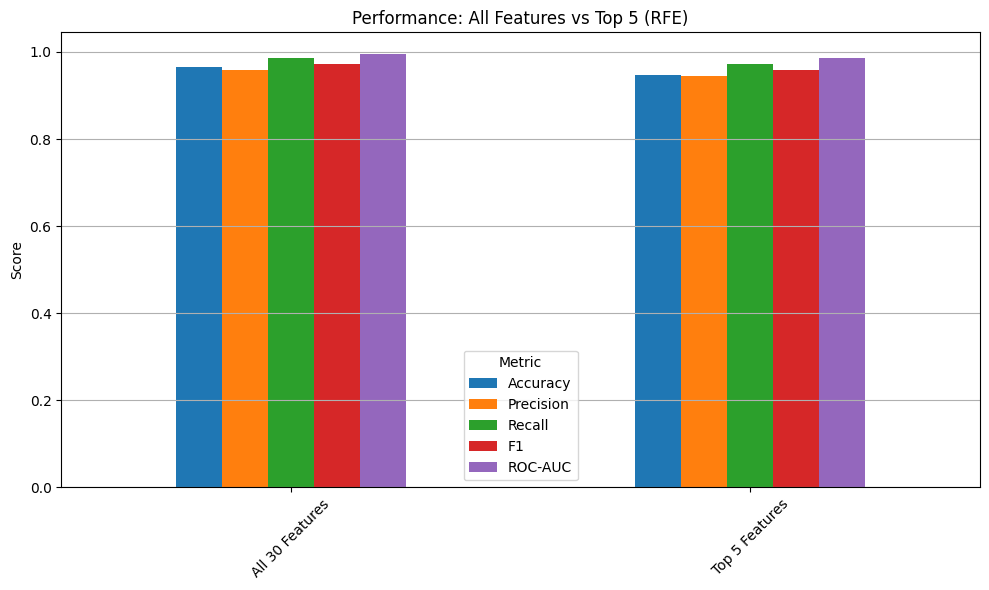

In [7]:
# To-Do 3: Train on ALL features vs SELECTED features
def evaluate_model(X_tr, X_te, y_tr, y_te, model_name):
    """Helper: Train LR + get metrics"""
    lr = LogisticRegression(max_iter=5000)
    lr.fit(X_tr, y_tr)
    y_pred = lr.predict(X_te)
    y_proba = lr.predict_proba(X_te)[:, 1]

    return {
        'Accuracy': accuracy_score(y_te, y_pred),
        'Precision': precision_score(y_te, y_pred),
        'Recall': recall_score(y_te, y_pred),
        'F1': f1_score(y_te, y_pred),
        'ROC-AUC': roc_auc_score(y_te, y_proba)
    }

# All features
metrics_all = evaluate_model(X_train_bc, X_test_bc, y_train_bc, y_test_bc, "All Features")

# Selected features (top 5)
X_train_selected = X_train_bc[selected_features]
X_test_selected = X_test_bc[selected_features]
metrics_selected = evaluate_model(X_train_selected, X_test_selected, y_train_bc, y_test_bc, "Top 5")

# Comparison table
comparison_df = pd.DataFrame({
    'All 30 Features': metrics_all,
    'Top 5 Features': metrics_selected
}).T
print("\n MODEL COMPARISON:")
print(comparison_df.round(3))

# Visualize comparison
comparison_df.plot(kind='bar', figsize=(10,6))
plt.title('Performance: All Features vs Top 5 (RFE)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


 EXPERIMENT RESULTS (Test Accuracy):
   N Features  Accuracy
0           3     0.789
1           5     0.947
2           7     0.947
3          10     0.947
4          15     0.956


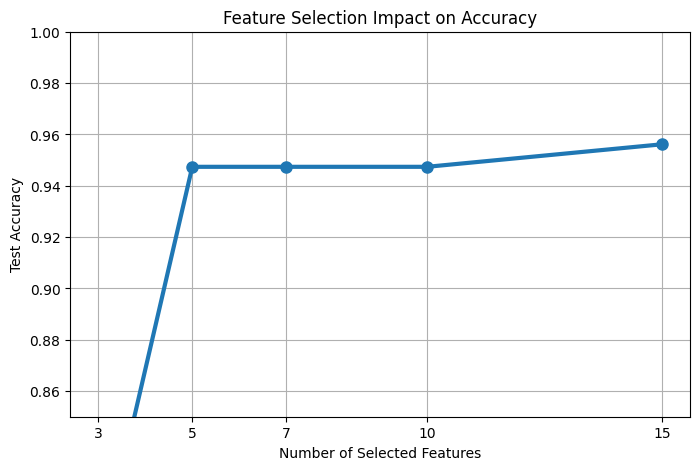

In [8]:
# To-Do 4: Experiment different # features
results_exp = {}
for n_features in [3, 5, 7, 10, 15]:
    rfe_exp = RFE(LogisticRegression(max_iter=5000), n_features_to_select=n_features)
    rfe_exp.fit(X_train_bc, y_train_bc)

    X_tr_sel = X_train_bc.iloc[:, rfe_exp.support_]
    X_te_sel = X_test_bc.iloc[:, rfe_exp.support_]

    metrics_exp = evaluate_model(X_tr_sel, X_te_sel, y_train_bc, y_test_bc, f"Top-{n_features}")
    results_exp[n_features] = metrics_exp['Accuracy']

print("\n EXPERIMENT RESULTS (Test Accuracy):")
exp_df = pd.DataFrame(list(results_exp.items()), columns=['N Features', 'Accuracy'])
print(exp_df.round(3))

# Plot experiment
plt.figure(figsize=(8,5))
plt.plot(exp_df['N Features'], exp_df['Accuracy'], 'o-', linewidth=3, markersize=8)
plt.xlabel('Number of Selected Features')
plt.ylabel('Test Accuracy')
plt.title('Feature Selection Impact on Accuracy')
plt.grid(True)
plt.xticks(exp_df['N Features'])
plt.ylim(0.85, 1.0)
plt.show()